## Setting up environment

First, we install the 🤗 transformers and datasets libraries, as well as the [Tesseract OCR engine](https://github.com/tesseract-ocr/tesseract) (built by Google). LayoutLM requires an external OCR engine of choice to turn a document into a list of words and bounding boxes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 11.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
! pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,591 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
# import requests
# import zipfile
# import io

# def download_data():
#     url = "https://www.dropbox.com/s/kuw05qmc4uy474d/RVL_CDIP_one_example_per_class.zip?dl=1"
#     r = requests.get(url)
#     z = zipfile.ZipFile(io.BytesIO(r.content))
#     z.extractall('/content/drive/MyDrive/DataLayoutLM')  # Chemin cible dans votre Drive

# download_data()


In [ ]:
# import requests, zipfile, io

# def download_data():
#     url = "https://www.dropbox.com/s/kuw05qmc4uy474d/RVL_CDIP_one_example_per_class.zip?dl=1"
#     r = requests.get(url)
#     z = zipfile.ZipFile(io.BytesIO(r.content))
#     z.extractall()

# download_data()

Let's look at a random training example (in this case, a resume):

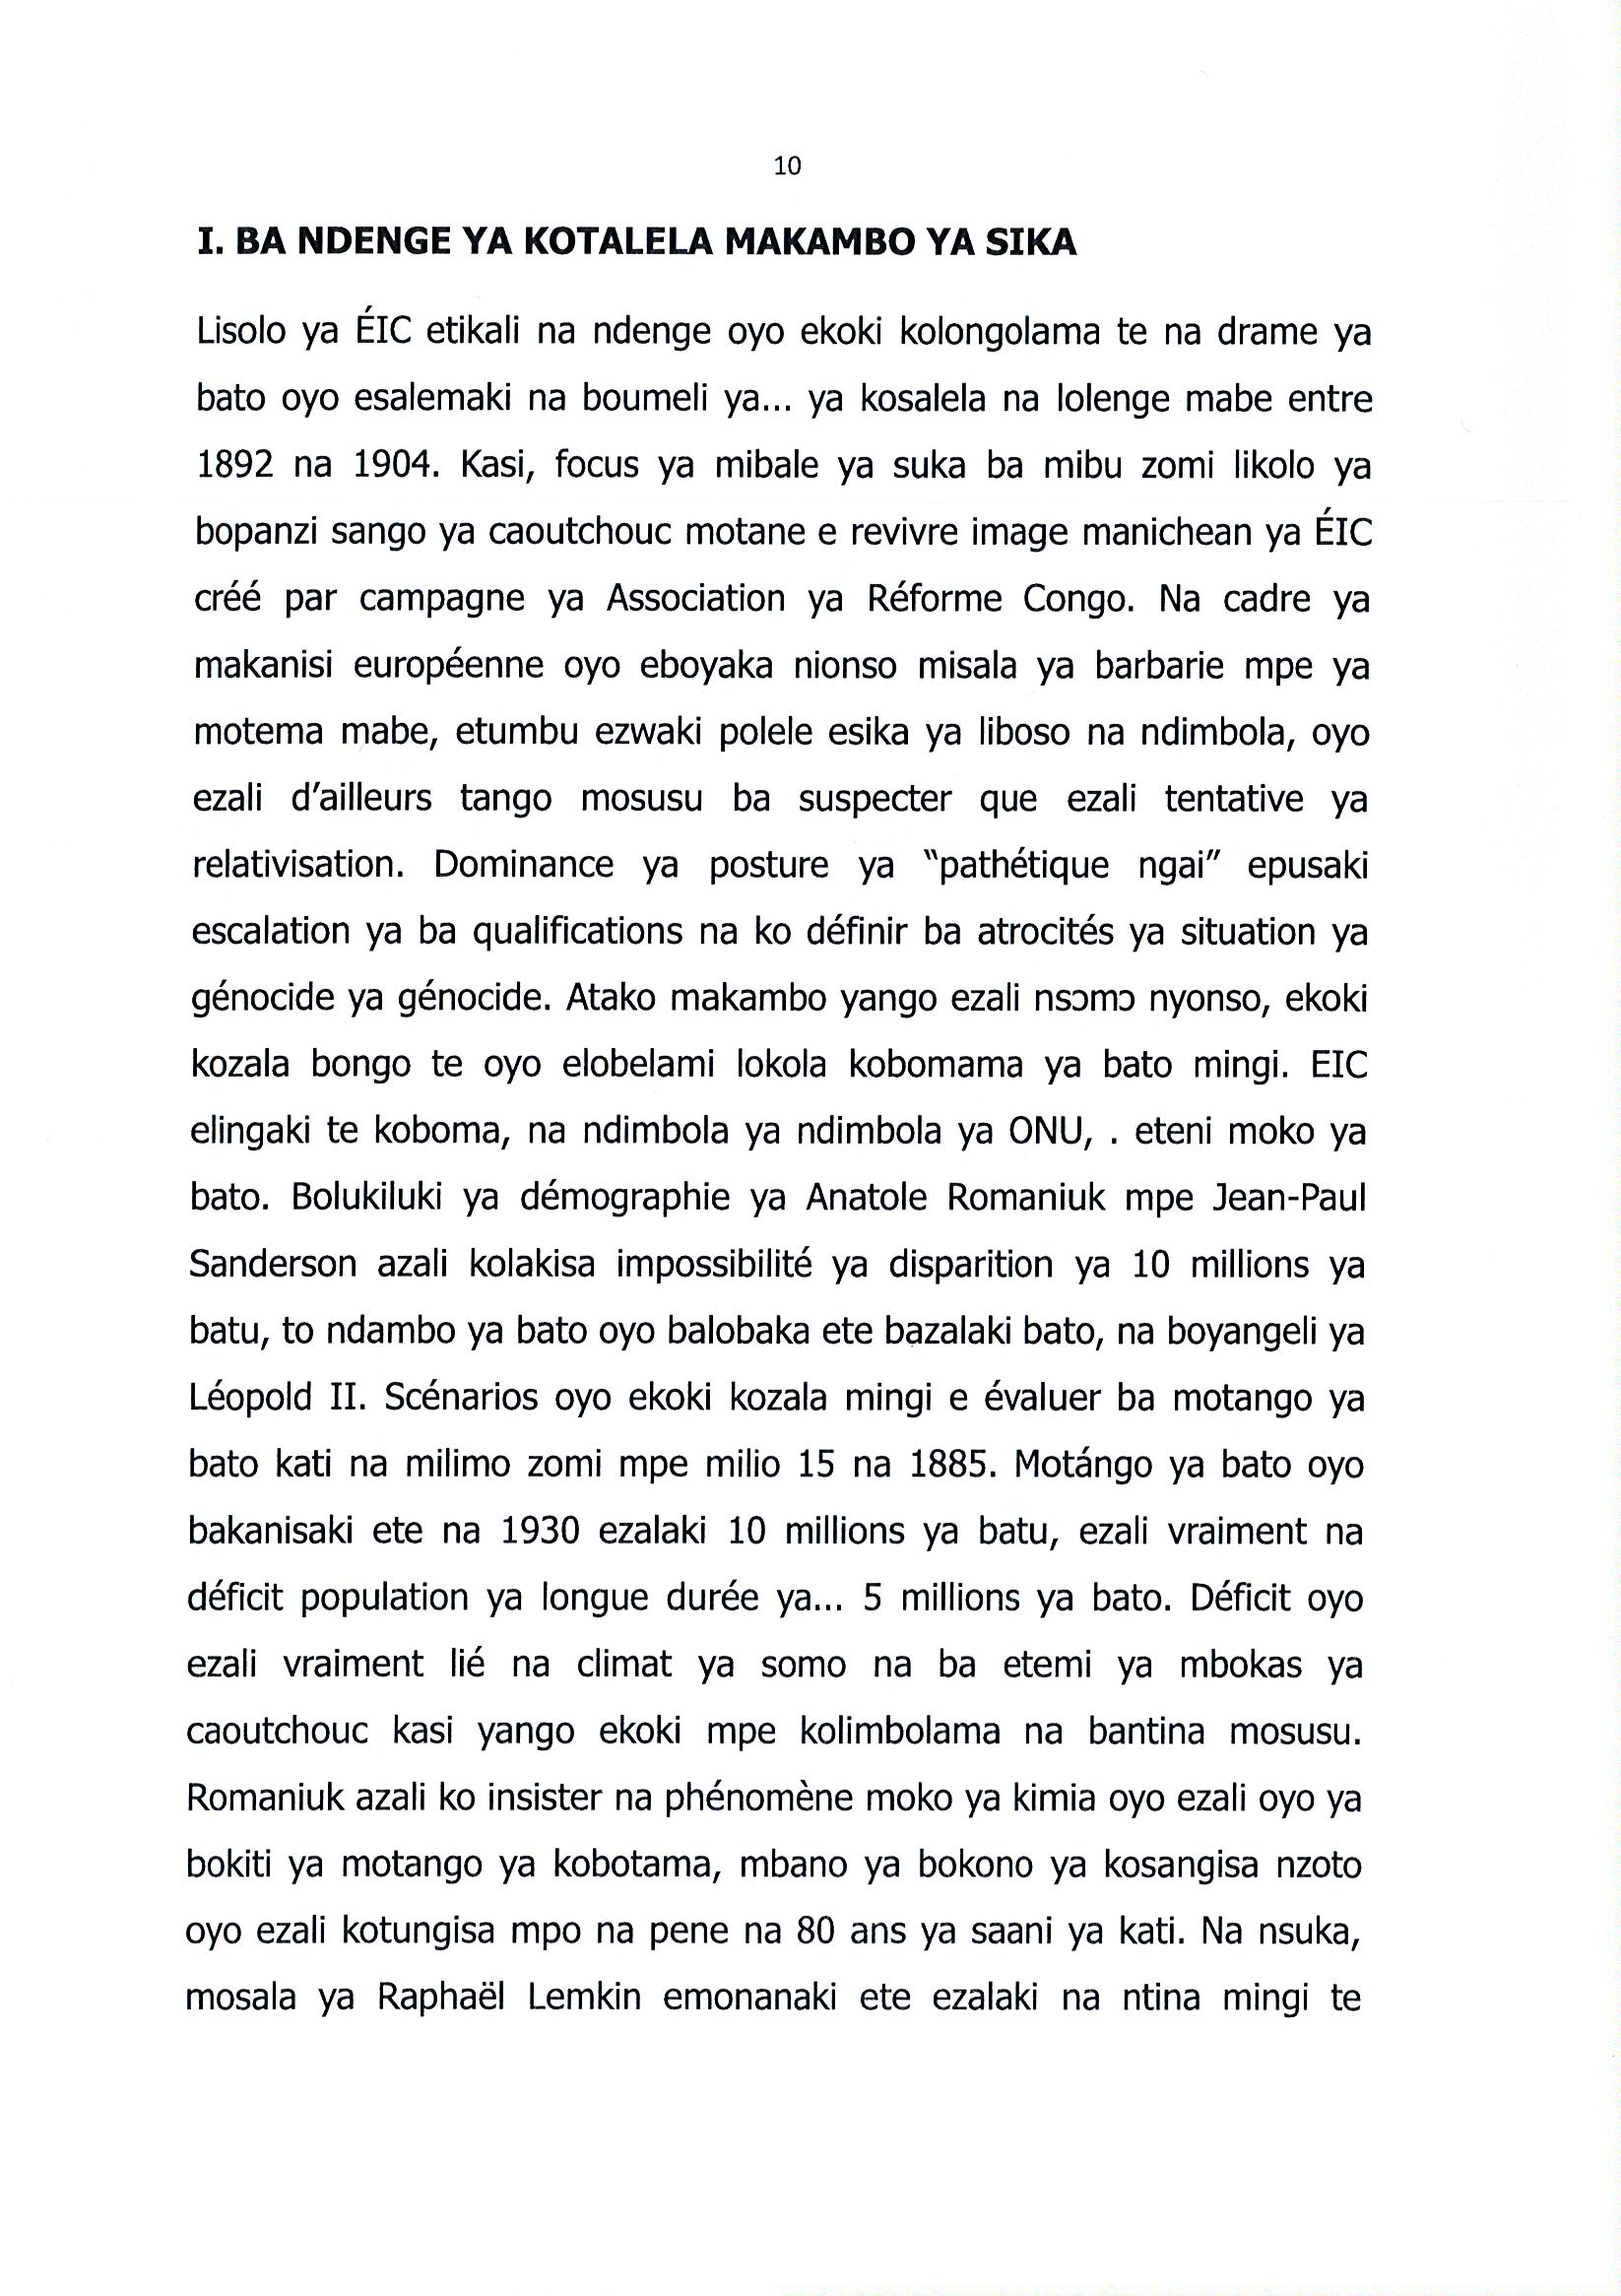

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/drive/MyDrive/DataLayoutLM/image_10/image_10.tiff")
image = image.convert("RGB")
image

We can use the Tesseract OCR engine to turn the image into a list of recognized words:

In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'10 I. BA NDENGE YA KOTALELA MAKAMBO YA SIKA Lisolo ya EIC etikali na ndenge oyo ekoki kolongolama te na drame ya bato oyo esalemaki na boumeli ya... ya kosalela na lolenge mabe entre 1892 na 1904. Kasi, focus ya mibale ya suka ba mibu zomi likolo ya bopanzi sango ya caoutchouc motane e revivre image manichean ya EIC créé par campagne ya Association ya Réforme Congo. Na cadre ya makanisi européenne oyo eboyaka nionso misala ya barbarie mpe ya motema mabe, etumbu ezwaki polele esika ya liboso na ndimbola, oyo ezali d’ailleurs tango mosusu ba suspecter que ezali tentative ya relativisation. Dominance ya posture ya “pathétique ngai” epusaki escalation ya ba qualifications na ko définir ba atrocités ya situation ya génocide ya génocide. Atako makambo yango ezali nsomo nyonso, ekoki kozala bongo te oyo elobelami lokola kobomama ya bato mingi. EIC elingaki te koboma, na ndimbola ya ndimbola ya ONU, . eteni moko ya bato. Bolukiluki ya démographie ya Anatole Romaniuk mpe Jean-Paul Sanderson az

We can also visualize the bounding boxes of the recognized words, as follows:

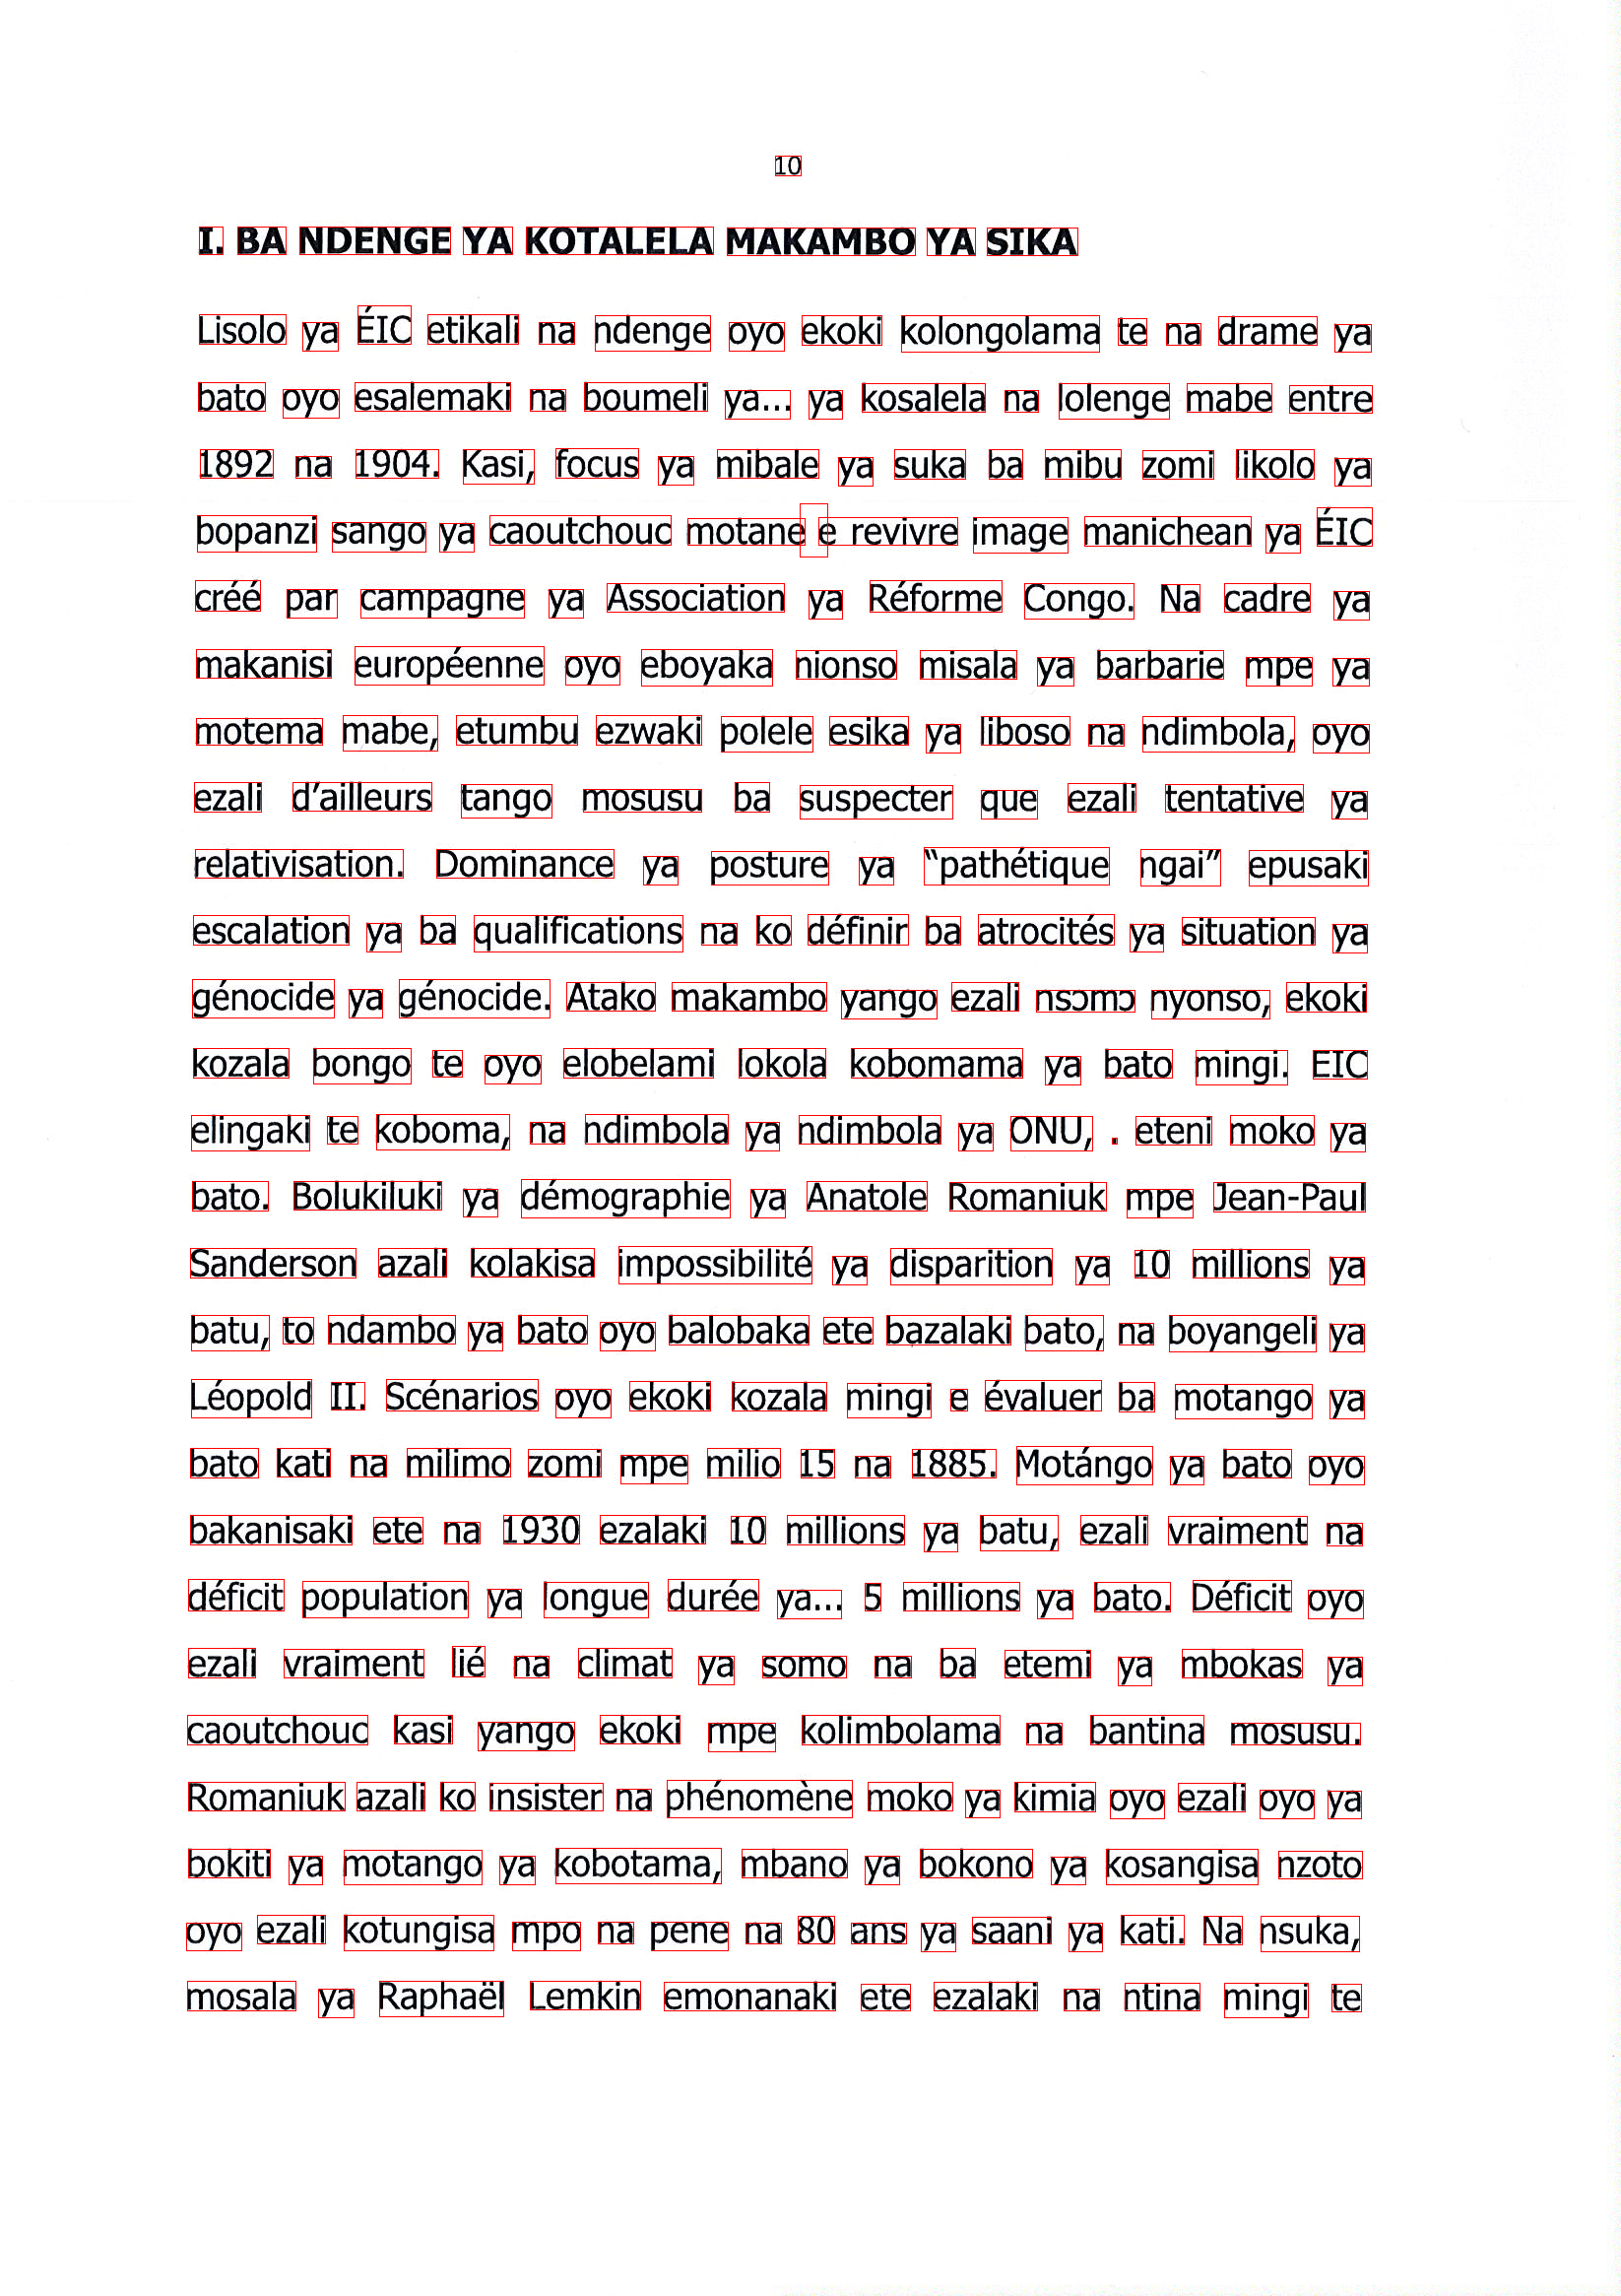

In [ ]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

## Preprocessing the data using 🤗 datasets

First, we convert the dataset into a Pandas dataframe, having 2 columns: `image_path` and `label`.

In [ ]:
import pandas as pd
import os

dataset_path = "/content/drive/MyDrive/DataLayoutLM"
labels = [label for label in os.listdir(dataset_path)]
idx2label = {v: k for v, k in enumerate(labels)}
label2idx = {k: v for v, k in enumerate(labels)}
label2idx

{'image_10': 0,
 'image_11': 1,
 'image_12': 2,
 'image_13': 3,
 'image_3': 4,
 'image_22': 5,
 'image_14': 6,
 'image_15': 7,
 'image_16': 8,
 'image_17': 9,
 'image_18': 10,
 'image_19': 11,
 'image_2': 12,
 'image_20': 13,
 'image_21': 14,
 'image_23': 15,
 'image_24': 16,
 'image_25': 17,
 'image_26': 18,
 'image_27': 19,
 'image_28': 20,
 'image_29': 21,
 'image_30': 22,
 'image_31': 23,
 'image_4': 24,
 'image_5': 25,
 'image_6': 26,
 'image_7': 27,
 'image_8': 28,
 'image_9': 29}

In [ ]:
# import os
# from PIL import Image

# # Chemin du dossier contenant les fichiers PNG
# input_folder = '/content/drive/MyDrive/data/training_data/images'

# # Chemin du dossier parent où les TIFF seront enregistrés
# output_folder = '/content/drive/MyDrive/DataLayoutLM'

# # Créer le dossier parent s'il n'existe pas
# os.makedirs(output_folder, exist_ok=True)

# # Parcourir chaque fichier dans le dossier d'entrée
# for file_name in os.listdir(input_folder):
#     if file_name.endswith('.png'):
#         # Créer un sous-dossier pour chaque fichier TIFF
#         subfolder_path = os.path.join(output_folder, file_name.split('.')[0])
#         os.makedirs(subfolder_path, exist_ok=True)

#         # Chemin complet du fichier source PNG
#         input_path = os.path.join(input_folder, file_name)

#         # Chemin complet du fichier de sortie TIFF
#         output_path = os.path.join(subfolder_path, file_name.replace('.png', '.tiff'))

#         # Charger l'image PNG et la sauvegarder en TIFF
#         image = Image.open(input_path)
#         image.save(output_path, format='TIFF')

# print("Conversion terminée avec succès !")


In [ ]:
# import os
# import pandas as pd

# images = []
# labels = []

# # Assurez-vous que dataset_path est correctement défini
# dataset_path = '/content/drive/MyDrive/DataLayoutLM'

# for label_folder, _, file_names in os.walk(dataset_path):
#     if label_folder != dataset_path:
#         label = label_folder[len(dataset_path)+1:]  # Extraire correctement le nom du label
#         for image in file_names:
#             # Construction correcte du chemin d'accès à l'image
#             image_path = os.path.join(label_folder, image)
#             images.append(image_path)
#             labels.append(label)

# # Création du DataFrame
# data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
# print(data.head())


In [ ]:
# images = []
# labels = []

# for label_folder, _, file_names in os.walk(dataset_path):
#   if label_folder != dataset_path:
#     label = label_folder[40:]
#     for _, _, image_names in os.walk(label_folder):
#       relative_image_names = []
#       for image in image_names:
#         relative_image_names.append(dataset_path + "/" + label + "/" + image)
#       images.extend(relative_image_names)
#       labels.extend([label] * len (relative_image_names))

# data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
# data.head()

In [ ]:
import os
import pandas as pd

images = []
labels = []

for label_folder, _, file_names in os.walk(dataset_path):
  if label_folder != dataset_path:
    label = os.path.basename(label_folder)  # Utiliser basename pour extraire le nom du label
    for _, _, image_names in os.walk(label_folder):
      relative_image_names = []
      for image in image_names:
        relative_image_names.append(os.path.join(dataset_path, label, image))
      images.extend(relative_image_names)
      labels.extend([label] * len(relative_image_names))

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
data.head()


image_path     label
0  /content/drive/MyDrive/DataLayoutLM/image_10/i...  image_10
1  /content/drive/MyDrive/DataLayoutLM/image_11/i...  image_11
2  /content/drive/MyDrive/DataLayoutLM/image_12/i...  image_12
3  /content/drive/MyDrive/DataLayoutLM/image_13/i...  image_13
4  /content/drive/MyDrive/DataLayoutLM/image_3/im...   image_3

In [ ]:
len(data)

30

Now, let's apply OCR to get the words and bounding boxes of every image. To do this efficiently, we turn our Pandas dataframe into a HuggingFace `Dataset` object, and use the `.map()` functionality to get the words and normalized bounding boxes of every image. Note that this can take a while to run (Tesseract seems a bit slow).

In [ ]:
from datasets import Dataset

def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

def apply_ocr(example):
        # get the image
        image = Image.open(example['image_path'])

        width, height = image.size

        # apply ocr to the image
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
            actual_boxes.append(actual_box)

        # normalize the bounding boxes
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))

        # add as extra columns
        assert len(words) == len(boxes)
        example['words'] = words
        example['bbox'] = boxes
        return example

dataset = Dataset.from_pandas(data)
updated_dataset = dataset.map(apply_ocr)

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

Next, we can turn the word-level 'words' and 'bbox' columns into token-level `input_ids`, `attention_mask`, `bbox` and `token_type_ids` using `LayoutLMTokenizer`.

In [ ]:
from transformers import LayoutLMTokenizer
import torch

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

def encode_example(example, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
  words = example['words']
  normalized_word_boxes = example['bbox']

  assert len(words) == len(normalized_word_boxes)

  token_boxes = []
  for word, box in zip(words, normalized_word_boxes):
      word_tokens = tokenizer.tokenize(word)
      token_boxes.extend([box] * len(word_tokens))

  # Truncation of token_boxes
  special_tokens_count = 2
  if len(token_boxes) > max_seq_length - special_tokens_count:
      token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]

  # add bounding boxes of cls + sep tokens
  token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]

  encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)
  # Padding of token_boxes up the bounding boxes to the sequence length.
  input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]
  padding_length = max_seq_length - len(input_ids)
  token_boxes += [pad_token_box] * padding_length
  encoding['bbox'] = token_boxes
  encoding['label'] = label2idx[example['label']]

  assert len(encoding['input_ids']) == max_seq_length
  assert len(encoding['attention_mask']) == max_seq_length
  assert len(encoding['token_type_ids']) == max_seq_length
  assert len(encoding['bbox']) == max_seq_length

  return encoding

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

In [ ]:
# from datasets import Features, Sequence, ClassLabel, Value, Array2D

# # Nombre de classes distinctes
# num_classes = 31  # Ou le nombre approprié basé sur votre analyse des données

# # Noms des classes
# class_names = [f'image_{i+1}' for i in range(num_classes)]

# features = Features({
#     'input_ids': Sequence(feature=Value(dtype='int64')),
#     'bbox': Array2D(dtype="int64", shape=(512, 4)),
#     'attention_mask': Sequence(Value(dtype='int64')),
#     'token_type_ids': Sequence(Value(dtype='int64')),
#     'label': ClassLabel(num_classes=num_classes, names=class_names),
#     'image_path': Value(dtype='string'),
#     'words': Sequence(feature=Value(dtype='string')),
# })

# encoded_dataset = updated_dataset.map(lambda example: encode_example(example),
#                                       features=features)


In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D



num_classes = 30  # Mettez à jour ce nombre selon l'analyse de vos données

features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'label': ClassLabel(num_classes=num_classes, names=[f'class_{i}' for i in range(num_classes)]),
    'image_path': Value(dtype='string'),
    'words': Sequence(feature=Value(dtype='string')),
})


encoded_dataset = updated_dataset.map(lambda example: encode_example(example),
                                      features=features)

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

Finally, we set the format to PyTorch, as the LayoutLM implementation in the Transformers library is in PyTorch. We also specify which columns we are going to use.

In [ ]:
encoded_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])


In [ ]:
print(len(encoded_dataset))


30


In [ ]:
dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=1, shuffle=True)
batch = next(iter(dataloader))
batch

{'input_ids': tensor([[  101,  2539, 16914, 12248,  8038,  6300,  1025, 17712,  8820,  3070,
          14268, 16914, 12248,  8038,  5003,  8737,  2050,  1051,  1041,  5092,
          18552,  4135,  1010, 10556,  5332, 17712,  4140, 25438,  2050,  6131,
          25438, 20391,  1014,  9587,  3406,  9587,  3683,  5831,  2863,  8915,
           1012,  2570, 13660,  2819,  2226,  6583, 10930,  1012,  1006,  3050,
           3286,  5092,  2474,  7059, 13807,  1007,  2316,  5937,  2080,  1010,
          19031,  8525, 11113, 12198,  2072, 20377,  2080,  2000, 11735, 24141,
           2050, 10210, 14545,  1025, 14753,  3995,  2000,  5092,  1011,  1050,
           9247,  2050, 20008,  3286,  4783, 23236, 27754,  2050, 20377,  2080,
          12835, 26230,  2050,  8038, 12849, 11097,  2050, 26661,  2063, 16042,
           2080,  1012,  1005,  8915,  1014, 23969, 28060,  3148, 11240,  5714,
           3676, 15191, 17417, 21790,  3489, 19021, 22043,  2721, 23971, 16656,
           8038, 19031,  85

Let's verify whether the input ids are created correctly by decoding them back to text:

In [ ]:
tokenizer.decode(batch['input_ids'][0].tolist())

"[CLS] 19 mbuma ya ye ; akosangisa mbuma ya mampa o ebombelo, kasi akotumba mpumbulu 0 moto mokozima te. 22 lokumu na yo. ( losambo la lisanga ) bandeko, kristu abyangi biso tobongola mitema ; bongo tobo - ndela nzambe tata apesa biso nguya ya koboya mabe manso.'te 0 eklezya mobimba basalisi baike basangela nsango ya kristu na mpiko, tosambela : ya bakonzi mpe bayangeli banso : bamipesa mobimba na mosala mwa kobongisa mokili mpo ya bolamu bwa bato banso, tosambela : bango, te, mpo mpo eleko ya boyei lomingo la 1 la boyei bandeko, lelo tobandimobu mwa sika mwa eklezya na eleko va boyei o nsango elamu tokoyoka ndenge kristu akolakisa biso nzelaya komilengele mpo ya koyambaye malamu, zambi mobikisi azali koya iokola ayaka 0 beteleme. ( losambo la ebandela ) e nzambe wa bokasi as7? tobandi kolengele eyenga ya mbotama ya yezu kristu ; osala'te tolanda ye 0 nzela ya bosembo ; mokolo kokata makambo ma bato toyingela na ye 0 bokonzi bwa likolo. tokobondela ( litangi lya 1 )'nzabobe akosangisa 

In [ ]:
idx2label[batch['label'][0].item()]

'image_19'

## Define the model

Here we define the model, namely `LayoutLMForSequenceClassification`. We initialize it with the weights of the pre-trained base model (`LayoutLMModel`). The weights of the classification head are randomly initialized, and will be fine-tuned together with the weights of the base model on our tiny dataset. Once loaded, we move it to the GPU.



In [ ]:
from transformers import LayoutLMForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=len(label2idx))
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/451M [00:00<?, ?B/s]

Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMForSequenceClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0-11): 12 x LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True

## Train the model

Here we train the model in familiar PyTorch fashion. We use the Adam optimizer with weight decay fix (normally you can also specify which variables should have weight decay and which not + a learning rate scheduler, see [here](https://github.com/microsoft/unilm/blob/5d16c846bec56b6e88ec7de4fc3ceb7c803571a4/layoutlm/examples/classification/run_classification.py#L94) for how the authors of LayoutLM did this), and train for 30 epochs. If the model is able to overfit it, then it means there are no issues and we can train it on the entire dataset.

In [ ]:
import torch
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Assurez-vous que 'dataloader' est bien défini et initialisé avant de calculer 't_total'
num_train_epochs = 50  # Nombre d'époques pour l'entraînement
t_total = len(dataloader) * num_train_epochs  # Nombre total de pas d'entraînement

optimizer = AdamW(model.parameters(), lr=5e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=t_total)

global_step = 0

# Début de la boucle d'entraînement
model.train()
for epoch in range(num_train_epochs):
    print("Epoch:", epoch)
    running_loss = 0.0
    correct = 0
    total = 0  # Compteur pour le total des échantillons traités

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        bbox = batch["bbox"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()  # Mise à jour du schedule de l'apprentissage après l'optimizer step

        running_loss += loss.item()
        predictions = outputs.logits.argmax(-1)
        correct += (predictions == labels).float().sum()
        total += labels.size(0)

    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total

    print("Training Loss:", epoch_loss)
    print("Training accuracy:", epoch_accuracy.item())


Epoch: 0
Training Loss: 1.0341777106126149
Training accuracy: 100.00000762939453
Epoch: 1
Training Loss: 1.313908988237381
Training accuracy: 86.66667175292969
Epoch: 2
Training Loss: 1.2553448458512624
Training accuracy: 93.33333587646484
Epoch: 3
Training Loss: 0.8724033613999684
Training accuracy: 100.00000762939453
Epoch: 4
Training Loss: 0.7073228637377421
Training accuracy: 100.00000762939453
Epoch: 5
Training Loss: 0.6030585472782453
Training accuracy: 100.00000762939453
Epoch: 6
Training Loss: 0.5040401354432106
Training accuracy: 100.00000762939453
Epoch: 7
Training Loss: 0.3896892125407855
Training accuracy: 100.00000762939453
Epoch: 8
Training Loss: 0.34138783713181814
Training accuracy: 100.00000762939453
Epoch: 9
Training Loss: 0.32130151490370434
Training accuracy: 100.00000762939453
Epoch: 10
Training Loss: 0.28233176420132317
Training accuracy: 100.00000762939453
Epoch: 11
Training Loss: 0.2508830805619558
Training accuracy: 100.00000762939453
Epoch: 12
Training Loss: 0

In [ ]:
import argparse

def evaluate(args, model, tokenizer, mode="val", prefix=""):
    """Fonction pour évaluer le modèle sur un ensemble de données donné."""
    eval_dataset = load_and_cache_examples(args, tokenizer, mode=mode)

    if not os.path.exists(args.output_dir) and args.local_rank in [-1, 0]:
        os.makedirs(args.output_dir)

    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args.per_gpu_eval_batch_size)

    # Mise en évaluation du modèle
    model.eval()
    eval_loss = 0.0
    nb_eval_steps = 0
    preds = None
    out_label_ids = None

    for batch in tqdm(eval_dataloader, desc="Evaluating"):
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            inputs = {
                'input_ids': batch[0],
                'attention_mask': batch[1],
                'labels': batch[3],
            }

            if args.model_type == "layoutlm":
                inputs['bbox'] = batch[4]

            if 'token_type_ids' in inputs:
                inputs['token_type_ids'] = batch[2] if args.model_type in ['bert', 'layoutlm'] else None

            outputs = model(**inputs)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1

        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs['labels'].detach().cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids, inputs['labels'].detach().cpu().numpy(), axis=0)

    eval_loss = eval_loss / nb_eval_steps
    preds = np.argmax(preds, axis=1)
    result = simple_accuracy(preds, out_label_ids)
    results = {"eval_loss": eval_loss, "eval_accuracy": result}

    output_eval_file = os.path.join(args.output_dir, prefix, "eval_results.txt")
    with open(output_eval_file, "w") as writer:
        for key in sorted(results.keys()):
            writer.write("%s = %s\n" % (key, str(results[key])))

    return results

def main():
    # Parse the arguments (assuming this is already done in the upper part of your script)
    args = parser.parse_args()

    # Setup CUDA, GPU & distributed training
    # This should also be part of your initial setup

    # Load pretrained model and tokenizer
    model, tokenizer = load_model_and_tokenizer(args)

    # Training
    if args.do_train:
        train_dataset = load_and_cache_examples(args, tokenizer, mode="train")
        global_step, tr_loss = train(args, train_dataset, model, tokenizer)
        logger.info("Global step: %s, Training loss: %s", global_step, tr_loss)

    # Evaluation
    if args.do_eval:
        result = evaluate(args, model, tokenizer)
        logger.info("Validation results: %s", result)

    return result


def setup_arg_parser():
    """Fonction pour configurer et retourner l'analyseur d'arguments."""
    parser = argparse.ArgumentParser()

    # Paramètres requis
    parser.add_argument("--data_dir", type=str, required=True, help="Chemin vers le répertoire de données.")
    parser.add_argument("--model_type", type=str, required=True, help="Type de modèle: bert, roberta, ou layoutlm.")
    parser.add_argument("--model_name_or_path", type=str, required=True, help="Chemin vers le modèle pré-entraîné ou son nom.")
    parser.add_argument("--output_dir", type=str, required=True, help="Répertoire où les sorties seront sauvegardées.")

    # Autres paramètres
    parser.add_argument("--config_name", type=str, help="Nom ou chemin vers la configuration pré-entraînée.")
    parser.add_argument("--tokenizer_name", type=str, help="Nom ou chemin vers le tokenizer pré-entraîné.")
    parser.add_argument("--max_seq_length", default=512, type=int, help="Longueur maximale des séquences d'entrée.")
    parser.add_argument("--do_train", action='store_true', help="Définir ce flag pour activer l'entraînement.")
    parser.add_argument("--do_eval", action='store_true', help="Définir ce flag pour activer l'évaluation.")
    parser.add_argument("--do_test", action='store_true', help="Définir ce flag pour activer les tests.")
    parser.add_argument("--per_gpu_train_batch_size", default=8, type=int, help="Taille de lot par GPU pour l'entraînement.")
    parser.add_argument("--per_gpu_eval_batch_size", default=8, type=int, help="Taille de lot par GPU pour l'évaluation.")
    parser.add_argument("--learning_rate", default=5e-5, type=float, help="Taux d'apprentissage initial.")
    parser.add_argument("--num_train_epochs", default=3, type=float, help="Nombre total d'époques d'entraînement.")
    parser.add_argument("--seed", type=int, default=42, help="Graine aléatoire pour la reproductibilité.")

    return parser

def main():
    parser = setup_arg_parser()
    args = parser.parse_args()

    # Configuration de CUDA, GPU et entraînement distribué selon les arguments
    ...

if __name__ == "__main__":
    main()


usage: colab_kernel_launcher.py [-h] --data_dir DATA_DIR --model_type MODEL_TYPE
                                --model_name_or_path MODEL_NAME_OR_PATH --output_dir OUTPUT_DIR
                                [--config_name CONFIG_NAME] [--tokenizer_name TOKENIZER_NAME]
                                [--max_seq_length MAX_SEQ_LENGTH] [--do_train] [--do_eval]
                                [--do_test] [--per_gpu_train_batch_size PER_GPU_TRAIN_BATCH_SIZE]
                                [--per_gpu_eval_batch_size PER_GPU_EVAL_BATCH_SIZE]
                                [--learning_rate LEARNING_RATE]
                                [--num_train_epochs NUM_TRAIN_EPOCHS] [--seed SEED]
colab_kernel_launcher.py: error: the following arguments are required: --data_dir, --model_type, --model_name_or_path, --output_dir


SystemExit: 2

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<ipython-input-43-d5eb6f8506ad>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_accuracies, 'b', label='Training accuracy', color ='tab:blue')


ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

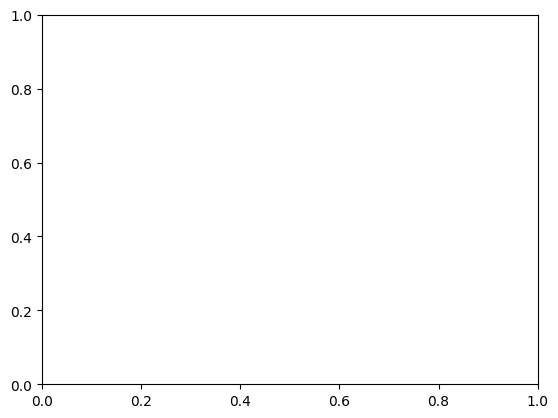

In [ ]:
import matplotlib.pyplot as plt

epochs = range(num_train_epochs)

plt.plot(epochs, train_accuracies, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_losses, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_losses, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
import torch
from torch.optim import AdamW
import torchmetrics
from transformers import get_linear_schedule_with_warmup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_train_epochs = 3
t_total = len(dataloader) * num_train_epochs  # Total number of training steps

optimizer = AdamW(model.parameters(), lr=5e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=t_total)

# Définissez le nombre de classes ici
nombre_de_classes = 30  # Remplacez par le nombre réel de classes dans votre problème

# Initialisation des métriques en spécifiant le type de tâche
accuracy_metric = torchmetrics.Accuracy(num_classes=nombre_de_classes, average='macro', task='multiclass').to(device)
precision_metric = torchmetrics.Precision(num_classes=nombre_de_classes, average='macro', task='multiclass').to(device)
recall_metric = torchmetrics.Recall(num_classes=nombre_de_classes, average='macro', task='multiclass').to(device)
f1_metric = torchmetrics.F1Score(num_classes=nombre_de_classes, average='macro', task='multiclass').to(device)

# Suite de votre code pour l'entraînement...


global_step = 0

# Mettre le modèle en mode entraînement
model.train()

for epoch in range(num_train_epochs):
    print("Epoch:", epoch)
    running_loss = 0.0
    correct = 0
    total = 0  # Ajouter un compteur pour le total des échantillons traités

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        bbox = batch["bbox"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()  # Réinitialiser les gradients avant le calcul

        # Forward pass
        outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        loss = outputs.loss
        running_loss += loss.item()

        # Backward pass pour obtenir les gradients
        loss.backward()

        # Mise à jour
        optimizer.step()
        scheduler.step()  # Mise à jour du schedule de l'apprentissage après l'optimizer step

        predictions = outputs.logits.argmax(-1)
        accuracy_metric.update(predictions, labels)
        precision_metric.update(predictions, labels)
        recall_metric.update(predictions, labels)
        f1_metric.update(predictions, labels)

    # Affichage des métriques pour l'époque
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = accuracy_metric.compute()
    epoch_precision = precision_metric.compute()
    epoch_recall = recall_metric.compute()
    epoch_f1 = f1_metric.compute()

    print(f"Epoch {epoch}: Loss = {epoch_loss}, Accuracy = {epoch_accuracy}, Precision = {epoch_precision}, Recall = {epoch_recall}, F1 = {epoch_f1}")

    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()


In [ ]:
from torch.utils.data import Dataset, DataLoader
import pytesseract
import numpy as np

class Dataset(Dataset):
    """RVL-CDIP dataset (small subset)."""

    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # get the image
        image = Image.open(data.iloc[idx].image_path)

        width, height = image.size

        # apply ocr to the image
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        words = list(ocr_df.text)
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+widght, top+height) to get the actual box
            actual_boxes.append(actual_box)

        # normalize the bounding boxes
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))

        # convert to token-level features
        encoding = convert_example_to_features(image, words, boxes, actual_boxes, self.tokenizer)

        # add the label
        print(idx)
        label = data.iloc[idx].label
        encoding["label"] = torch.tensor(label2idx[label])

        return encoding